In [1]:
import os, sys
import numpy as np
import rasterio
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
import getpass

import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# connect to the API
user = 'joemcglinchy'
# user = input('Sentinel Hub Username: ')
pw = getpass.getpass('Sentinel Hub Password: ')
api = SentinelAPI(user, pw, 'https://scihub.copernicus.eu/dhus')

# download single scene by known product id
#api.download(<product_id>)

Sentinel Hub Password: ········


In [3]:
api

## specify a geometry from http://geojson.io ... this is near Denver 

In [4]:
gj_geom = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              -105.15220642089844,
              39.69345079688953
            ],
            [
              -104.952392578125,
              39.69345079688953
            ],
            [
              -104.952392578125,
              39.836486422931394
            ],
            [
              -105.15220642089844,
              39.836486422931394
            ],
            [
              -105.15220642089844,
              39.69345079688953
            ]
          ]
        ]
      }
    }
  ]
}

## Execute a search query. for all keyword options, see lower section of https://scihub.copernicus.eu/twiki/do/view/SciHubUserGuide/3FullTextSearch 

In [8]:
# search by polygon, time, and Hub query keywords... 
# 7/24/2016 is date of DG strip which was used for impervious surface mapping
# 6/1/2018 - 7/31/2019 are containement dates for durango 416 fire
# 12/4/2017 - 1/12/2018 are containment dates for Thomas fire

footprint = geojson_to_wkt(gj_geom)
products_S2 = api.query(footprint,
                     date = ('20160701', date(2016, 7, 31)),
                     platformname = 'Sentinel-2',
                     cloudcoverpercentage = (0, 30))

products_S1 = api.query(footprint,
                     date = ('20160701', date(2016, 7, 31)),
                     platformname = 'Sentinel-1')

In [9]:
s1_items = list(products_S1.items())
s1_items[0]

# should also be able to convert to pandas
s1_res_df = api.to_geodataframe(products_S1)
s2_res_df = api.to_geodataframe(products_S2)

In [10]:
# s1_res_df.plot()
# plt.show()
s1_res_df.shape, s2_res_df.shape


((13, 34), (4, 29))

In [11]:
print('Sentinel-1 results')
s1_res_df.head()

Sentinel-1 results


,title,link,link_alternative,link_icon,summary,ingestiondate,beginposition,endposition,missiondatatakeid,orbitnumber,...,orbitdirection,polarisationmode,productclass,producttype,platformname,size,status,processed,productconsolidation,geometry
11a2c49a-7e57-46c5-8997-564c4b9c05b3,S1A_IW_RAW__0SSV_20160713T010211_20160713T0102...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-13T01:02:11.49Z, Instrument: SAR...",2016-07-13 12:16:42.138,2016-07-13 01:02:11.490,2016-07-13 01:02:43.890,76904,12123,...,ASCENDING,VV,S,RAW,Sentinel-1,766.09 MB,ARCHIVED,F,SLICE,"POLYGON ((-104.9884 39.2381, -105.3924 41.1925..."
1d4692c3-3bb6-4c85-8306-5acc4bbb1976,S1A_IW_SLC__1SSV_20160718T130905_20160718T1309...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-18T13:09:05.753Z, Instrument: SA...",2016-07-19 04:21:18.508,2016-07-18 13:09:05.753,2016-07-18 13:09:35.592,77574,12203,...,DESCENDING,VV,S,SLC,Sentinel-1,3.92 GB,ARCHIVED,F,NaN,"POLYGON ((-104.794701 39.52021, -107.694572 39..."
3422b3f2-bfff-4b07-8268-a285f571448c,S1A_IW_RAW__0SSV_20160708T005340_20160708T0054...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-08T00:53:40.208Z, Instrument: SA...",2016-07-08 05:34:51.900,2016-07-08 00:53:40.208,2016-07-08 00:54:12.608,76297,12050,...,ASCENDING,VV,S,RAW,Sentinel-1,757.22 MB,ARCHIVED,F,SLICE,"POLYGON ((-102.7161 38.1846, -103.1164 40.1393..."
4e436aff-2310-4fda-83e2-a20ca981751e,S1A_IW_SLC__1SSV_20160713T010149_20160713T0102...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-13T01:01:49.587Z, Instrument: SA...",2016-07-13 13:55:07.350,2016-07-13 01:01:49.587,2016-07-13 01:02:16.554,76904,12123,...,ASCENDING,VV,S,SLC,Sentinel-1,3.63 GB,ARCHIVED,F,NaN,"POLYGON ((-107.780861 39.450935, -104.865166 3..."
4f56d5e7-c197-4a00-990e-ee700babbcf5,S1A_IW_SLC__1SSV_20160718T130933_20160718T1310...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-18T13:09:33.343Z, Instrument: SA...",2016-07-19 04:21:30.562,2016-07-18 13:09:33.343,2016-07-18 13:10:01.239,77574,12203,...,DESCENDING,VV,S,SLC,Sentinel-1,3.65 GB,ARCHIVED,F,NaN,"POLYGON ((-105.193359 37.981159, -108.021957 3..."


In [12]:
print('Sentinel-2 results')
s2_res_df.head()

Sentinel-2 results


,title,link,link_alternative,link_icon,summary,ingestiondate,beginposition,endposition,orbitnumber,relativeorbitnumber,...,platformidentifier,orbitdirection,platformserialidentifier,processingbaseline,processinglevel,producttype,platformname,size,processed,geometry
04ba0fd5-2c8e-425f-a012-f8e13010b656,S2A_OPER_PRD_MSIL1C_PDMC_20160714T002101_R098_...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-13T17:52:58Z, Instrument: MSI, M...",2016-07-14 18:04:30.089,2016-07-13 17:52:58,2016-07-13 17:52:58,5529,98,...,2015-000A,DESCENDING,Sentinel-2A,02.04,Level-1C,S2MSI1C,Sentinel-2,1.89 GB,F,POLYGON ((-106.1831726066032 40.64479480422486...
65e049a9-d02a-495e-920f-1387e538ab60,S2A_OPER_PRD_MSIL1C_PDMC_20160706T235228_R141_...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-06T18:02:54Z, Instrument: MSI, M...",2016-07-07 00:06:32.068,2016-07-06 18:02:54,2016-07-06 18:02:54,5429,141,...,2015-000A,DESCENDING,Sentinel-2A,02.04,Level-1C,S2MSI1C,Sentinel-2,2.01 GB,F,POLYGON ((-108.6668335320047 39.72681533153163...
7e7a9226-6532-44e5-912e-bb8379406d2d,S2A_OPER_PRD_MSIL1C_PDMC_20160717T004536_R141_...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-16T18:02:21Z, Instrument: MSI, M...",2016-07-17 01:08:23.198,2016-07-16 18:02:21,2016-07-16 18:02:21,5572,141,...,2015-000A,DESCENDING,Sentinel-2A,02.04,Level-1C,S2MSI1C,Sentinel-2,6.76 GB,F,POLYGON ((-108.6965295968872 38.82628170870513...
8b17d275-3b9d-42d2-a1e3-787770d9973d,S2A_OPER_PRD_MSIL1C_PDMC_20160724T003511_R098_...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-23T17:46:23Z, Instrument: MSI, M...",2016-07-24 00:48:52.466,2016-07-23 17:46:23,2016-07-23 17:46:23,5672,98,...,2015-000A,DESCENDING,Sentinel-2A,02.04,Level-1C,S2MSI1C,Sentinel-2,6.38 GB,F,"POLYGON ((-105.361362505983 39.6593985890248, ..."


In [13]:
s2_res_df.describe()['cloudcoverpercentage']

count     4.000000
mean      7.648587
std       7.070540
min       0.007491
25%       4.105595
50%       6.816468
75%      10.359460
max      16.953920
Name: cloudcoverpercentage, dtype: float64

In [14]:
## subset Sentinel-1 results by 'producttype'
prod_groups_list = list(s1_res_df.groupby('producttype'))
for i, item in enumerate(prod_groups_list):
    print(i, 'producttype: ', item[0])
    
GRD_df = prod_groups_list[0][1]
RAW_df = prod_groups_list[1][1]
SLC_df = prod_groups_list[2][1]

0 producttype:  GRD
1 producttype:  RAW
2 producttype:  SLC


In [15]:
print('Sentinel-1 GRD products')
GRD_df.head()

Sentinel-1 GRD products


,title,link,link_alternative,link_icon,summary,ingestiondate,beginposition,endposition,missiondatatakeid,orbitnumber,...,orbitdirection,polarisationmode,productclass,producttype,platformname,size,status,processed,productconsolidation,geometry
82ffc6cd-eaec-42eb-80cf-c98d21fc77df,S1A_IW_GRDH_1SSV_20160708T005343_20160708T0054...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-08T00:53:43.908Z, Instrument: SA...",2016-07-08 07:48:39.486,2016-07-08 00:53:43.908,2016-07-08 00:54:08.907,76297,12050,...,ASCENDING,VV,S,GRD,Sentinel-1,813.42 MB,ARCHIVED,F,NaN,"POLYGON ((-105.827087 39.820259, -102.899338 4..."
8b6fa6ca-89e4-4337-95fb-c79f54a97a7c,S1A_IW_GRDH_1SSV_20160713T010215_20160713T0102...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-13T01:02:15.189Z, Instrument: SA...",2016-07-13 12:39:09.568,2016-07-13 01:02:15.189,2016-07-13 01:02:40.188,76904,12123,...,ASCENDING,VV,S,GRD,Sentinel-1,824.82 MB,ARCHIVED,F,NaN,"POLYGON ((-108.155365 40.868427, -105.138275 4..."
c1e9f6bd-b8dd-4b9f-942a-ee0c9d1e2872,S1A_IW_GRDH_1SSV_20160718T130905_20160718T1309...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-18T13:09:05.765Z, Instrument: SA...",2016-07-19 04:09:07.005,2016-07-18 13:09:05.765,2016-07-18 13:09:34.792,77574,12203,...,DESCENDING,VV,S,GRD,Sentinel-1,941.64 MB,ARCHIVED,F,NaN,"POLYGON ((-104.792519 39.569881, -107.701714 3..."
f0b0aa7f-c9bb-4878-bc56-1700a0e6ce26,S1A_IW_GRDH_1SSV_20160713T010150_20160713T0102...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-13T01:01:50.189Z, Instrument: SA...",2016-07-13 12:38:21.536,2016-07-13 01:01:50.189,2016-07-13 01:02:15.187,76904,12123,...,ASCENDING,VV,S,GRD,Sentinel-1,824.5 MB,ARCHIVED,F,NaN,"POLYGON ((-107.766365 39.367741, -104.816986 3..."


In [16]:
print('Sentinel-1 RAW products')
RAW_df.head()

Sentinel-1 RAW products


,title,link,link_alternative,link_icon,summary,ingestiondate,beginposition,endposition,missiondatatakeid,orbitnumber,...,orbitdirection,polarisationmode,productclass,producttype,platformname,size,status,processed,productconsolidation,geometry
11a2c49a-7e57-46c5-8997-564c4b9c05b3,S1A_IW_RAW__0SSV_20160713T010211_20160713T0102...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-13T01:02:11.49Z, Instrument: SAR...",2016-07-13 12:16:42.138,2016-07-13 01:02:11.490,2016-07-13 01:02:43.890,76904,12123,...,ASCENDING,VV,S,RAW,Sentinel-1,766.09 MB,ARCHIVED,F,SLICE,"POLYGON ((-104.9884 39.2381, -105.3924 41.1925..."
3422b3f2-bfff-4b07-8268-a285f571448c,S1A_IW_RAW__0SSV_20160708T005340_20160708T0054...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-08T00:53:40.208Z, Instrument: SA...",2016-07-08 05:34:51.900,2016-07-08 00:53:40.208,2016-07-08 00:54:12.608,76297,12050,...,ASCENDING,VV,S,RAW,Sentinel-1,757.22 MB,ARCHIVED,F,SLICE,"POLYGON ((-102.7161 38.1846, -103.1164 40.1393..."
f4b44b31-d283-4704-84e6-ff9730b3be97,S1A_IW_RAW__0SSV_20160718T130906_20160718T1309...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-18T13:09:06.093Z, Instrument: SA...",2016-07-19 04:01:17.895,2016-07-18 13:09:06.093,2016-07-18 13:09:38.493,77574,12203,...,DESCENDING,VV,S,RAW,Sentinel-1,760.25 MB,ARCHIVED,F,SLICE,"POLYGON ((-107.1698 41.3891, -107.5743 39.4348..."
f84826e7-7369-46a9-b83f-12d9b9bf5399,S1A_IW_RAW__0SSV_20160708T005405_20160708T0054...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-08T00:54:05.209Z, Instrument: SA...",2016-07-08 05:37:05.044,2016-07-08 00:54:05.209,2016-07-08 00:54:27.445,76297,12050,...,ASCENDING,VV,S,RAW,Sentinel-1,511.26 MB,ARCHIVED,F,SLICE,"POLYGON ((-103.0244 39.693, -103.302 41.0342, ..."


In [17]:
print('Sentinel-1 SLC products')
SLC_df.head()

Sentinel-1 SLC products


,title,link,link_alternative,link_icon,summary,ingestiondate,beginposition,endposition,missiondatatakeid,orbitnumber,...,orbitdirection,polarisationmode,productclass,producttype,platformname,size,status,processed,productconsolidation,geometry
1d4692c3-3bb6-4c85-8306-5acc4bbb1976,S1A_IW_SLC__1SSV_20160718T130905_20160718T1309...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-18T13:09:05.753Z, Instrument: SA...",2016-07-19 04:21:18.508,2016-07-18 13:09:05.753,2016-07-18 13:09:35.592,77574,12203,...,DESCENDING,VV,S,SLC,Sentinel-1,3.92 GB,ARCHIVED,F,NaN,"POLYGON ((-104.794701 39.52021, -107.694572 39..."
4e436aff-2310-4fda-83e2-a20ca981751e,S1A_IW_SLC__1SSV_20160713T010149_20160713T0102...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-13T01:01:49.587Z, Instrument: SA...",2016-07-13 13:55:07.350,2016-07-13 01:01:49.587,2016-07-13 01:02:16.554,76904,12123,...,ASCENDING,VV,S,SLC,Sentinel-1,3.63 GB,ARCHIVED,F,NaN,"POLYGON ((-107.780861 39.450935, -104.865166 3..."
4f56d5e7-c197-4a00-990e-ee700babbcf5,S1A_IW_SLC__1SSV_20160718T130933_20160718T1310...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-18T13:09:33.343Z, Instrument: SA...",2016-07-19 04:21:30.562,2016-07-18 13:09:33.343,2016-07-18 13:10:01.239,77574,12203,...,DESCENDING,VV,S,SLC,Sentinel-1,3.65 GB,ARCHIVED,F,NaN,"POLYGON ((-105.193359 37.981159, -108.021957 3..."
640bb5f1-7fd3-451a-bce0-65a985d65d94,S1A_IW_SLC__1SSV_20160713T010214_20160713T0102...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-13T01:02:14.414Z, Instrument: SA...",2016-07-13 13:31:23.131,2016-07-13 01:02:14.414,2016-07-13 01:02:41.379,76904,12123,...,ASCENDING,VV,S,SLC,Sentinel-1,3.63 GB,ARCHIVED,F,NaN,"POLYGON ((-108.167854 40.941002, -105.181114 4..."
d498f832-d3e0-44d6-abd2-68c796b2b452,S1A_IW_SLC__1SSV_20160708T005343_20160708T0054...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-08T00:53:43.308Z, Instrument: SA...",2016-07-08 14:10:22.020,2016-07-08 00:53:43.308,2016-07-08 00:54:10.265,76297,12050,...,ASCENDING,VV,S,SLC,Sentinel-1,3.55 GB,ARCHIVED,F,NaN,"POLYGON ((-105.845459 39.902348, -102.923134 4..."


In [18]:
# download a couple scenes by uuid
# help(api.download)
SLC_uuid = SLC_df['uuid'][1]
SLC_title = SLC_df['title'][1]
if not os.path.exists(SLC_title + '.zip'):
    print('Downloading SLC product')
    SLC_dl = api.download(SLC_uuid)

# same for GRD product
GRD_uuid = GRD_df['uuid'][1]
GRD_title = GRD_df['title'][1]
if not os.path.exists(GRD_title + '.zip'):
    print('Downloading GRD product')
    GRD_dl = api.download(GRD_uuid)

In [19]:
## you can get the path by assigning the download call to a variable 
import zipfile
for zippath in (SLC_dl['path'], GRD_dl['path']):
    zip_ref = zipfile.ZipFile(zippath, 'r')
    zip_ref.extractall(os.path.join('.', 's1_files'))
    zip_ref.close()

NameError: name 'SLC_dl' is not defined

In [40]:
SLC_dl

{'date': datetime.datetime(2016, 7, 13, 1, 1, 49, 587000),
 'downloaded_bytes': 2457374071,
 'footprint': 'POLYGON((-107.780861 39.450935,-104.865166 39.844887,-104.531631 38.225182,-107.379280 37.830017,-107.780861 39.450935))',
 'id': '4e436aff-2310-4fda-83e2-a20ca981751e',
 'md5': '07D737E68A9E13C357BDC29DFF4887C5',
 'path': '.\\S1A_IW_SLC__1SSV_20160713T010149_20160713T010216_012123_012C68_1F18.zip',
 'size': 2457374071,
 'title': 'S1A_IW_SLC__1SSV_20160713T010149_20160713T010216_012123_012C68_1F18',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('4e436aff-2310-4fda-83e2-a20ca981751e')/$value"}

In [39]:
## open the file with rasterio
# SLC_fi = os.path.join('s1_files', SLC_dl['title'] + '.SAFE', 'manifest.safe')
SLC_fi = os.path.join('s1_files', SLC_title + '.SAFE', 'manifest.safe')
# s1_filepath = r"C:\Projects\sentinel_api\s1_files\S1A_IW_RAW__0SSV_20161216T130058_20161216T130130_014405_0175A1_975B.SAFE\s1a-iw-raw-s-vv-20161216t130058-20161216t130130-014405-0175a1.dat"
# s1_filepath = r"C:/Projects/sentinel_api/s1_files/S1A_IW_GRDH_1SDV_20160830T010152_20160830T010217_012823_01439D_86AC.SAFE/manifest.safe"

with rasterio.open(SLC_fi, 'r') as src:
    print(src.profile)
    #arr = src.read() # careful... this could kill the kernel
    #print(arr.shape)

with rasterio.open(SLC_fi, 'r') as src:    
    for ji, window in src.block_windows(1):
        r = src.read(1, window=window)
        print(r.shape)
        break
        
with rasterio.open(SLC_fi, 'r') as src:
    r = src.read(1, window=((5000,5500), (5000,5500)))
    print(r.shape)
    

# !gdalinfo $SLC_fi

C:\software\Anaconda3\envs\eapy_gbdx\lib\site-packages\rasterio\__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


{'driver': 'SAFE', 'dtype': 'complex', 'nodata': None, 'width': 24669, 'height': 13608, 'count': 1, 'crs': CRS({}), 'transform': (0.0, 1.0, 0.0, 0.0, 0.0, 1.0), 'affine': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'blockxsize': 21670, 'blockysize': 1, 'tiled': True}
(1, 21670)
(500, 500)


(array([[0.  +0.j, 0.  +0.j, 0.  +0.j, ..., 0.  +0.j, 0. +70.j, 0.+196.j],
        [0. +34.j, 0. +42.j, 0. +10.j, ..., 0.+114.j, 0. +53.j, 0.  +0.j],
        [0. +14.j, 0.  +0.j, 0.  +5.j, ..., 0.  +0.j, 0.  +0.j, 0.  +0.j],
        ...,
        [0. +33.j, 0.  +0.j, 0.  +8.j, ..., 0.+171.j, 0.+104.j, 0. +23.j],
        [0. +23.j, 0.  +0.j, 0.  +0.j, ..., 0.+173.j, 0.+124.j, 0.  +0.j],
        [0. +30.j, 0. +19.j, 0.  +0.j, ..., 0.+105.j, 0.+114.j, 0. +15.j]]),
 <matplotlib.image.AxesImage at 0x201da07b2b0>)

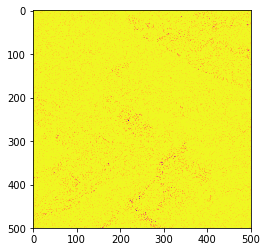

In [44]:
r, plt.imshow(np.abs(r), cmap='plasma_r')

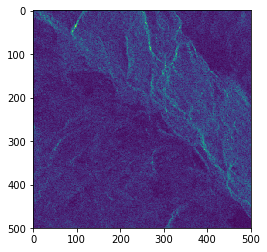

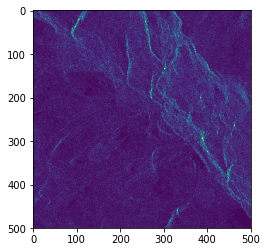

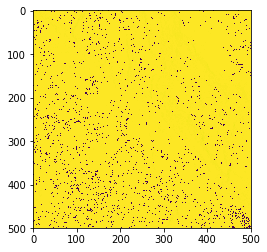

In [65]:
sub_arr = arr[:, 500:1000, 500:1000]
plt.imshow(sub_arr[0])
plt.show()
plt.imshow(sub_arr[1])
plt.show()
plt.imshow(sub_arr[0] - sub_arr[1])

In [66]:
help(api.query)

Help on method query in module sentinelsat.sentinel:

query(area=None, date=None, raw=None, area_relation='Intersects', order_by=None, limit=None, offset=0, **keywords) method of sentinelsat.sentinel.SentinelAPI instance
    Query the OpenSearch API with the coordinates of an area, a date interval
    and any other search keywords accepted by the API.
    
    Parameters
    ----------
    area : str, optional
        The area of interest formatted as a Well-Known Text string.
    date : tuple of (str or datetime) or str, optional
        A time interval filter based on the Sensing Start Time of the products.
        Expects a tuple of (start, end), e.g. ("NOW-1DAY", "NOW").
        The timestamps can be either a Python datetime or a string in one of the
        following formats:
            - yyyyMMdd
            - yyyy-MM-ddThh:mm:ss.SSSZ (ISO-8601)
            - yyyy-MM-ddThh:mm:ssZ
            - NOW
            - NOW-<n>DAY(S) (or HOUR(S), MONTH(S), etc.)
            - NOW+<n>DAY(